<a href="https://colab.research.google.com/github/crislanecas/estudos_python/blob/main/Alura%26OracleNextEducation/07_Introdu%C3%A7%C3%A3o_Machine_Learning_Aula_5_Dummy_Classifiers_e_%C3%81rvore_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importa a biblioteca Pandas.
import pandas as pd

# Importando os dados

In [ ]:
# Importa os dados que estão na URL.
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')

Visualizando os dados importados

In [ ]:
# Mostra as 5 primeiras linhas do dataframe.
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


# Ajustando os dados

In [ ]:
# Cria um dicionários para receber os valores correspondentes, conforme definido abaixo.
renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}

# Renomeia as colunas conforme dicionário criado acima.
dados = dados.rename(columns=renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
# Cria um dicionários para fazer a correspondencia de valores, conforme definido abaixo.
trocar = {
    'no': 0,
    'yes': 1
}

# Mapea todos campos da coluna, tendo como parâmetro a dicionário criado acima.
# Atribui o mapa à mesma vendido.
dados.vendido = dados.vendido.map(trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
# Importa a biblioteca Datetime.
from datetime import datetime

In [ ]:
# Ytiliza a função today() para obter a data atualizada do dia e extrair apenas o ano.
ano_atual = datetime.today().year

# Calcula a idade do veículo subtraindo do ano atual a ano do modelo.
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [ ]:
# Coverte os valores de milhas para quilometros (km) e atribui o valor a uma nova coluna.
dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [ ]:
# Apagando as colunas que não serão utilizadas.
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


# Estimando valores

In [ ]:
# Importa as bibliotecas necessárias.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Separa os dados entre x e y, sendo x as variáveis independentes e y dependente que queremos estimar.
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [ ]:
# Define o SEED para gerar números aleatórios para função train_test_split(), LinearSVC() e DummyClassifier().
SEED = 5
np.random.seed(SEED)

# Separa os dados em treino e teste.
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


## Modelo LinearSVC

In [ ]:
# Cria um modelo classificação LinearSVC().
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

# Calcula a acurácia do modelo.
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 46.88%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Modelo DummyClassifier - Stratified

In [ ]:
# Cria um modelo classificação estratificado que pode ser usado como baseline, por ser bastate simples.
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)

# Calcula a acurácia do modelo utilizando o método score()
acuracia = dummy_stratified.score(teste_x, teste_y) * 100
print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 52.44%


## Modelo DummyClassifier - Most Frequent

In [ ]:
# Cria um modelo de classificação por frequência que também pode ser usado como baseline, por ser bastate simples.
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)

# Calcula a acurácia do modelo utilizando o método score().
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


## Modelo SVC com StandarScaler

In [ ]:
# Separa novamente os dados em treino e teste.
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Utiliza o StandardScaler() para reescalonar os dados para uma faixa similar.
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

# Utiliza a função SVC() para instanciar o modelo.
modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

# Calcula a acurácia do modelo.
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.44%


## Modelo DecisionTreeClassifier

In [ ]:
# Cria um modelo de classifiação de árvore de decisão.
# O parâmetro max_depth define os níveis profundidade da decisão. Profundida máxima até 64.
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

# Calcula a acurácia do modelo.
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 78.28%


In [ ]:
# Importar a ferramenta para visualização gráfica da árvore da biblioteca scikit-learn.
from sklearn.tree import export_graphviz
import graphviz

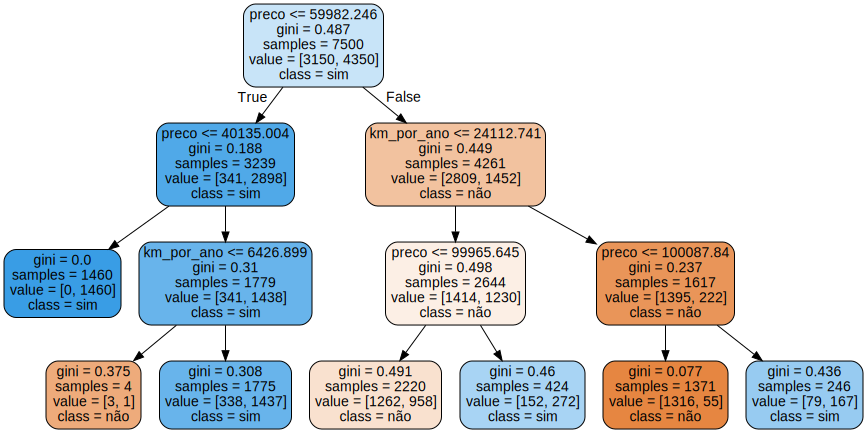

In [ ]:
# Define os parâmetros para visualização da árvore de decisão.
features = x.columns
# O dot_data é o formato de um gráfico e servirá de base para a plotagem.
dot_data = export_graphviz(modelo, out_file=None, # out_file preciosa ser informado se desejar salvar a visualização em um arquivo.
                           filled = True, rounded = True, # filled deixa os quadros coloridos e rounded com bordas arredondadas.
                           feature_names = features,
                           class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico